Importing relevant packages from PyTorch

In [113]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 24 16:02:40 2021

@author: s2110992
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

#mnist_data = datasets.MNIST('data',train=True, download = True, transform = transforms.ToTensor())
#mnist_data = list(mnist_data)[:4096] #data of size powers of 2 works better


Simulating Data

In [114]:
training_data_size = 10000
group_size = training_data_size//2
data_size = 100
data = []
#for i in range(training_data_size):
#    data.append(torch.rand(data_size))
#data_tensor = torch.rand((training_data_size,data_size))
training_set = np.zeros((training_data_size,data_size))
training_set[:group_size,:] = np.random.uniform(size =(group_size,data_size))
training_set[group_size:,:] = np.random.normal(loc = 0.5, size =(group_size,data_size))
#print(training_set[0])
training_set = np.random.permutation(training_set)
#print(training_set[0])
data_tensor = torch.FloatTensor(training_set)
#print(data_tensor[-1])

Training Data and Training Parameters

In [115]:
#Note we can make BATCH_SIZE smaller than training data set then it 
#does iterative gradient steps.
LEARNING_RATE = 1e-3
NUM_EPOCHS = 1000
BATCH_SIZE = training_data_size

In [122]:
# Creating the architecture of the Neural Network

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Linear(in_features=data_size, out_features=128)
        self.enc2 = nn.Linear(in_features=128, out_features = 64) 
        self.enc3 = nn.Linear(in_features = 64, out_features = 32) #maybe add 64 -> 32 to increase accuracy
        self.enc4 = nn.Linear(in_features = 32, out_features = 16)
        self.enc5 = nn.Linear(in_features = 16,out_features = 4)
        # decoder 
        self.dec1 = nn.Linear(in_features=4, out_features=16)
        self.dec2 = nn.Linear(in_features=16, out_features=32)#maybe add 64 -> 32 to increase accuracy
        self.dec3 = nn.Linear(in_features=32, out_features=64)
        self.dec4 = nn.Linear(in_features=64, out_features=128)
        self.dec5 = nn.Linear(in_features =128, out_features =data_size)
    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
        
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x
net = Autoencoder()
print(net)
net(torch.rand(data_size))

Autoencoder(
  (enc1): Linear(in_features=100, out_features=128, bias=True)
  (enc2): Linear(in_features=128, out_features=64, bias=True)
  (enc3): Linear(in_features=64, out_features=32, bias=True)
  (enc4): Linear(in_features=32, out_features=16, bias=True)
  (enc5): Linear(in_features=16, out_features=4, bias=True)
  (dec1): Linear(in_features=4, out_features=16, bias=True)
  (dec2): Linear(in_features=16, out_features=32, bias=True)
  (dec3): Linear(in_features=32, out_features=64, bias=True)
  (dec4): Linear(in_features=64, out_features=128, bias=True)
  (dec5): Linear(in_features=128, out_features=100, bias=True)
)


tensor([0.0000, 0.0055, 0.0000, 0.0000, 0.0085, 0.0000, 0.0000, 0.0929, 0.0378,
        0.0000, 0.0000, 0.0034, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0297, 0.0000, 0.0356, 0.0000, 0.0000, 0.0000, 0.0275,
        0.0488, 0.0221, 0.0979, 0.0690, 0.0000, 0.0336, 0.0000, 0.0555, 0.0482,
        0.0000, 0.0000, 0.0915, 0.0297, 0.0836, 0.0538, 0.0212, 0.0476, 0.0000,
        0.0360, 0.0262, 0.0000, 0.0000, 0.0320, 0.0000, 0.0474, 0.0000, 0.0000,
        0.0000, 0.0420, 0.1263, 0.0000, 0.0000, 0.0249, 0.0000, 0.0000, 0.0000,
        0.0256, 0.0029, 0.0000, 0.0517, 0.0393, 0.0434, 0.0038, 0.0755, 0.0000,
        0.0929, 0.1162, 0.0229, 0.0558, 0.0821, 0.0475, 0.0227, 0.0000, 0.0000,
        0.0901, 0.0112, 0.0000, 0.0000, 0.0000, 0.0659, 0.0286, 0.1097, 0.0000,
        0.0516, 0.1037, 0.0041, 0.0000, 0.0000, 0.0000, 0.0404, 0.0000, 0.0000,
        0.0000], grad_fn=<ReluBackward0>)

In [123]:
#using Mean Square Error as the Loss function.
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [124]:
#Training Step!.
loss_vector = np.zeros(NUM_EPOCHS)
for epoch in range(NUM_EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(training_data_size):
        # get the inputs;
        inputs = data_tensor[i]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    loss_vector[epoch] = running_loss
    if (epoch >=1)&(abs(loss_vector[epoch] - loss_vector[epoch - 1])< 0.1):
        break
    #if epoch%10 ==0:
    
    print('running loss=',running_loss, 'epoch = ', epoch)
        #if i % 2000 == 1999:    # print every 2000 mini-batches
         #   print('[%d, %5d] loss: %.3f' %
          #        (epoch + 1, i + 1, running_loss / 2000))
           # running_loss = 0.0

print('Finished Training')
hidden = net.enc5(F.relu(net.enc4(F.relu(net.enc3(F.relu(net.enc2(F.relu(net.enc1(torch.rand(data_size))))))))))
print(hidden)

running loss= 6171.244535006583 epoch =  0
running loss= 6041.854611329734 epoch =  1
running loss= 6035.300600282848 epoch =  2
running loss= 6006.251295246184 epoch =  3
running loss= 5942.666968472302 epoch =  4
running loss= 5901.191245667636 epoch =  5
running loss= 5885.33065161854 epoch =  6
running loss= 5837.620441630483 epoch =  7
running loss= 5785.171305067837 epoch =  8
running loss= 5754.512824811041 epoch =  9
running loss= 5708.664125010371 epoch =  10
running loss= 5648.009822152555 epoch =  11
running loss= 5626.3119106814265 epoch =  12
running loss= 5622.025429286063 epoch =  13
running loss= 5618.041031882167 epoch =  14
running loss= 5613.145715177059 epoch =  15
running loss= 5611.6302113980055 epoch =  16
running loss= 5589.336114399135 epoch =  17
running loss= 5590.899689532816 epoch =  18
running loss= 5583.998833090067 epoch =  19
running loss= 5587.64175439626 epoch =  20
running loss= 5584.5444390922785 epoch =  21
running loss= 5583.790338024497 epoch =  

Cluster Feature Plot!

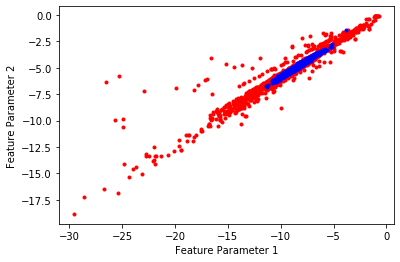

In [133]:
number_of_points = 1000
uniform_points = np.random.uniform(size =(number_of_points,data_size))
uniform_points = torch.FloatTensor(uniform_points)
normal_points = np.random.normal(loc = 0.5,size =(number_of_points,data_size))
normal_points = torch.FloatTensor(normal_points)

normal_feature1 = np.zeros(number_of_points)
normal_feature2 = np.zeros(number_of_points)

uniform_feature1 = np.zeros(number_of_points)
uniform_feature2 = np.zeros(number_of_points)

for i in range(number_of_points):
    uniform_feature = net.enc5(F.relu(net.enc4(F.relu(net.enc3(F.relu(net.enc2(F.relu(net.enc1(uniform_points[i])))))))))
    normal_feature = net.enc5(F.relu(net.enc4(F.relu(net.enc3(F.relu(net.enc2(F.relu(net.enc1(normal_points[i])))))))))
    uniform_feature= uniform_feature.detach().numpy()
    normal_feature = normal_feature.detach().numpy()
    normal_feature1[i] = normal_feature[1]
    normal_feature2[i] = normal_feature[2]
    uniform_feature1[i] = uniform_feature[1]
    uniform_feature2[i] = uniform_feature[2]
    
plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
plt.plot(normal_feature1,normal_feature2,'r.')
plt.plot(uniform_feature1,uniform_feature2,'b.')
plt.show()


Plot Histogram of Latent Parameters for Normal and Uniformly Distributed Points


Plot $L^{2}$ norm between theory and practice (after scale and shifting)

Could implement Variational Autoencoder?

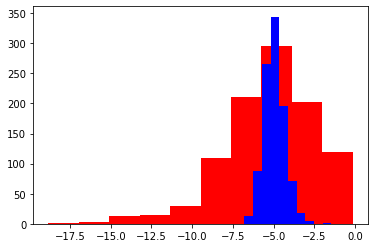

In [134]:
plt.figure()
plt.hist(normal_feature2, color = 'red')
plt.hist(uniform_feature2, color = 'blue')

plt.show()